# Early stage diabetes risk prediction

This dataset contains the sign and symptom data of newly diabetic or would be diabetic patient.

Dataset information:
This has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by doctor.

Dataset source: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#


**Attribute Information:**

- Age 1.20-65
- Sex 1. Male, 2.Female
- Polyuria 1.Yes, 2.No.
- Polydipsia 1.Yes, 2.No.
- sudden weight loss 1.Yes, 2.No.
- weakness 1.Yes, 2.No.
- Polyphagia 1.Yes, 2.No.
- Genital thrush 1.Yes, 2.No.
- visual blurring 1.Yes, 2.No.
- Itching 1.Yes, 2.No.
- Irritability 1.Yes, 2.No.
- delayed healing 1.Yes, 2.No.
- partial paresis 1.Yes, 2.No.
- muscle stiness 1.Yes, 2.No.
- Alopecia 1.Yes, 2.No.
- Obesity 1.Yes, 2.No.
- Class 1.Positive, 2.Negative.


**Note:** The intention of this notebook is to show how we can quickly create a ML model on diabetes risk prediction, without spending large amount of time optimisting the model.

## Library imports

In [1]:
#NumPy for numerical computing
import numpy as np

#Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

#Matplotlib for visualisation
import matplotlib.pyplot as plt
%matplotlib inline

#function for splitting training and testing set
from sklearn.model_selection import train_test_split

## Exploratory Analysis

In [2]:
# load data from CSV
df = pd.read_csv('diabetes_data_upload.csv')

In [3]:
# dataframe dimension
df.shape

(520, 17)

In [4]:
# column datatypes
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [5]:
#display first few observations
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
# display last few observations
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


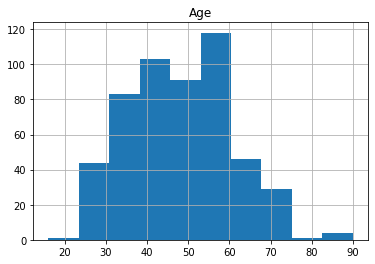

In [7]:
# plot histogram for numeric features. Only age feature will display here.
df.hist()

plt.show()

In [8]:
# statistic summary for categorical features.
df.describe(include=['object'])

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


## Data Cleaning

data is in good shape

## Feature Engineering

In [9]:
# encode binary feature for gender
df.Gender.replace(['Male','Female'],[1,0], inplace = True)

In [10]:
# encode binary feature for target variable
df['class'].replace(['Positive', 'Negative'],[1,0], inplace = True)

In [11]:
# encore remaining binary features (yes & no) 
for feature in df.dtypes[df.dtypes == 'object'].index:
    df[feature].replace(['Yes','No'], [1,0], inplace = True)

In [12]:
# split data into separate target object (y) and separate features (X) object.
y = df['class']

X = df.drop('class', axis = 1)

In [13]:
# Check if we have balance target variable.
df['class'].describe()

count    520.000000
mean       0.615385
std        0.486973
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: class, dtype: float64

**Discussion point:** 
The mean is 0.615 - it means that we have about 61.5%  of target variable is positive value and 39.5% is negative value.

## Algorithm Selection

Import 3 algorithms. 

Tree ensemble model generally works better on imbalanced class and can model non-linear relationships well.

A linear model is included for comparison. 

In [14]:
# import 3 classification models.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## Model Training

Data will be splited to testing and training set. Random seed is set for replicable results.

Default model hyperparameters are used - no tuning on hyperparameters.

In [15]:
# split data into training and testing data.
# stratify on target variable since the target variable is imbalanced.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

#print number of observations
print(len(X_train), len(X_test), len(y_train), len(y_test))

416 104 416 104


In [16]:
#instantiate all the 3 clf models, use random_state

clf_lr = LogisticRegression(random_state = 1234)
clf_rf = RandomForestClassifier(random_state = 1234)
clf_gb = GradientBoostingClassifier(random_state = 1234)

In [17]:
# fit all 3 models
clf_lr.fit(X_train, y_train)

clf_rf.fit(X_train, y_train)

clf_gb.fit(X_train, y_train)


C:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
pred_lr = clf_lr.predict_proba(X_test)
pred_lr = [p[1] for p in pred_lr]

pred_rf = clf_rf.predict_proba(X_test)
pred_rf = [p[1] for p in pred_rf]

pred_gb = clf_gb.predict_proba(X_test)
pred_gb = [p[1] for p in pred_gb]

In [19]:
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(y_test, pred_lr)
print("Logistic Regression AUROC: "+str(auroc))

auroc = roc_auc_score(y_test, pred_rf)
print("Random Forest AUROC: "+str(auroc))

auroc = roc_auc_score(y_test, pred_gb)
print("Gradient Boosting AUROC: "+str(auroc))

Logistic Regression AUROC: 0.9914062499999999
Random Forest AUROC: 1.0
Gradient Boosting AUROC: 0.994140625


## Insights & Analysis

Random Forest model generally works well out-of-the-box (without requiring much tuning on hyperparameters), it can model non-linear relationships, and is quite robust to outliers. Random Forest model (Tree ensembles) also tends to perform better with imbalanced class because their hierarchical structure that allows them to learn signals from both classes.


AUROC score is used to evaluate the model performance. the higher the score, the more accuracy the model predicts the output. An AUROC is 0.99 means that if we randomly choose 1 patient, our model would be able to distinguish whether the patient is diabetes, would be diabetes or not in 99% of the time.
